# Stress Detection using Python
Stress detection with machine learning from text strings.

The dataset for this task contains data posted on subreddits related to mental health. 

This dataset contains various mental health problems shared by people about their life.

This dataset is labelled as 0 and 1, where 0 indicates no stress and 1 indicates stress.

The data is: stress.csv

In [ ]:
# Install if needed
#!pip3 install nltk
#!pip3 install wordcloud

In [46]:
import pandas as pd
import numpy as np

In [51]:
data = pd.read_csv("stress_csv.csv", sep=';')
#print(data.head())

In [52]:
# Check for NA/Null
print(data.isnull().sum())

text            0
stress_label    0
dtype: int64


# Prepare the text column
Prepare the text column of this dataset to clean the text column with stopwords, links, special symbols and language errors:

In [53]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tuehe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

Have a look at the most used words by the people sharing about their life problems on social media by visualizing a word cloud of the text column:

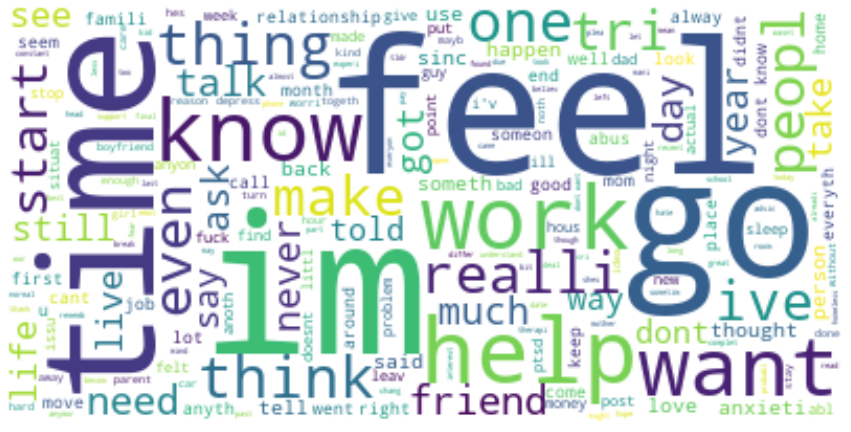

In [55]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Stress Detection Model
The label column in this dataset contains labels as 0 and 1. 0 means no stress, and 1 means stress. 

Use Stress and No stress labels instead of 1 and 0. 

Prepare this column accordingly and select the text and label columns for the process of training a machine learning model:

In [57]:
data["stress_label"] = data["stress_label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "stress_label"]]
print(data.head())

                                                text stress_label
0  said felt way sugget go rest trigger ahead you...       Stress
1  hey rassist sure right place post goe  im curr...    No Stress
2  mom hit newspap shock would know dont like pla...       Stress
3  met new boyfriend amaz kind sweet good student...       Stress
4  octob domest violenc awar month domest violenc...       Stress


## Split this dataset into training and test sets:

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["stress_label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

This task is based on the problem of binary classification, I will be using the Bernoulli Naive Bayes algorithm, which is one of the best algorithms for binary classification problems. 

Train the stress detection model:

In [60]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

# Text exsamples

- People need to take care of their mental health
- Sometime I feel like I need some help

In [61]:
# No Stress
user = 'People need to take care of their mental health'
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

['No Stress']


In [62]:
# Stress
user = 'Sometime I feel like I need some help'
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

['Stress']


In [63]:
# User imput
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text:  My partner and me are splitting up


['No Stress']


This is how you can train a stress detection model to detect stress from social media posts. 

This machine learning model can be improved by feeding it with more data.